# Using .cut , groupby and pivot_tables with panda

I started playing with panda just a few days ago, most of my starting points came from  Alfred Essa and his <a href="https://www.youtube.com/watch?v=eRpFC2CKvao&list=PLyBBc46Y6aAz54aOUgKXXyTcEmpMisAq3">youtube channel</a> (Awesome starting point for people new to pandas and data analysis).

To challenge myselft a little bit (or to complicate things in my head), I came up with the following problem using the Titanic csv file: 


**i.-Create a histogram with the distribution of passengers by Class and by Age range**

After a few days I soon realized that this was a bit over the stuff covered on the videos, and after a while I started exploring other options. I didn't find a specify *how-to* with the exact steps I needed, but putting everything together I was able to come up with something I really liked. As with everything in life, I'm sure they got it a be 100 different ways in doing the same.

# 1.- Prepwork: Create a table with the ranges

** Load the libraries **

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows',10)

In [2]:
titanic = pd.read_csv('data/titanic.csv')

In [3]:
# Create the ranges for the .cut method
bins = [0,20,40,60,80]

**We will use the cut to put the date in bins**

In [4]:
# this will create a new column "range" and it will use the Age info to populate this column info
titanic['range'] = pd.cut(titanic['Age'], bins)

In [5]:
# let's group this by the 'range' we just created
grouped = titanic.groupby('range')

**Let's play a bit with the groupby method** , 

In [6]:
# Just to see the count per 'range'
grouped.Pclass.count()

range
(0, 20]     179
(20, 40]    385
(40, 60]    128
(60, 80]     22
Name: Pclass, dtype: int64

**Interesting but at the end is not the solution I'm looking for** , I'm sure if I massage this a bit more I could create a Series or another DataFrame with this info

In [7]:
# Let's count what we have in each range
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

491 in Class 3 / 
216 in Class 1 /
184 in Class 2

The output below shows some of the information I need, but I'm not sure how to put this on a way that I can plotted

## Next Step
How can we put everything together?

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 40]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(20, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 40]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(20, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(20, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 40]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(0, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20, 40]"


# 2.- Problem: 

My next step was to create a distribution table by age and class. I tried several options and I was temtep to use groupby , but I wasn't very sucesful.  I then read a bit more about **'pivot tables'** and how they work, so I give it a try below

In [18]:
table = pd.pivot_table(titanic, values='Age', index=['Pclass'], columns = ['range'], aggfunc = 'count')

**Logic**: Create the table named 'table' from the titatic Dataframe, the values of the table will be from the 'Age' column, the index from the Pclass and the columns by the range (previusly defined by .cut function).

The 'aggfunc' is important since it helps to tell the algo what to do with the "value" data, in this case we just want to count.

In [19]:
table

range,"(0, 20]","(20, 40]","(40, 60]","(60, 80]"
Pclass,,,,
1,21,89,62,14
2,35,104,31,3
3,123,192,35,5


** This is the table I was looking for, Lets plot this guy**

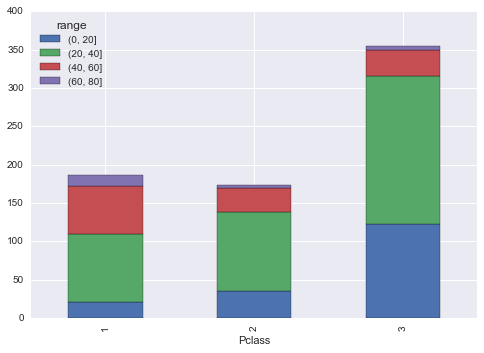

In [21]:
table.plot(kind='bar', stacked=True)

At last the result I was hoping for. this is a list by age and class of all the passengers of the titanic.

** Next ** , let's try to do the same table but just with the survivors